## Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Function definition

In [ ]:
def f(x):
  return np.log(x + np.sqrt(1 + x**2)) + x**2

def grad_f(x):
  return 1/np.sqrt(1 + x**2) + 2*x

## Nesterov's Accelerated Gradient Descent

In [ ]:
# Lipschitz constant L and Modulus of convexity mu
L, mu = 2 + 2/(3*np.sqrt(3)), 2 - 2/(3*np.sqrt(3))
alpha = 1/L
beta = (np.sqrt(L/mu) - 1)/(np.sqrt(L/mu) + 1)
x0 = 100

In [ ]:
def nesterov_agd(x0, alpha, beta, tol = 1e-7, max_iters = 1000):

  # Setting up Values
  x_prev = x0
  x_curr = x0

  # History
  history = [f(x0)]

  for k in range(max_iters):
    # Computation
    y_curr = x_curr + beta*(x_curr - x_prev)
    x_new = y_curr - alpha*grad_f(y_curr)

    history.append(f(x_new))

    # Update
    x_prev = x_curr
    x_curr = x_new

    if np.abs(grad_f(x_new)) < tol:
      break

  return x_curr, history

## Heavy-Ball Method

In [ ]:
def heavy_ball(x0, alpha, beta, tol = 1e-7, max_iters = 1000):

  # Setting up Values
  x_prev = x0
  x_curr = x0

  # History
  history = [f(x0)]

  for k in range(max_iters):
    # Computation
    y_curr = x_curr + beta*(x_curr - x_prev)
    x_new = y_curr - alpha*grad_f(x_curr)

    history.append(f(x_new))

    # Update
    x_prev = x_curr
    x_curr = x_new

    if np.abs(grad_f(x_new)) < tol:
      break

  return x_curr, history

## Comparison

In [ ]:
x_final_agd, history_agd = nesterov_agd(x0, alpha = alpha, beta = beta)
x_final_hb, history_hb = heavy_ball(x0, alpha = alpha, beta = beta)

In [ ]:
print(f'Number of iterations for Accelerated Gradient Descent: {len(history_agd) - 1}')
print(f'Number of iterations for Heavy Ball method: {len(history_hb) - 1}')

Number of iterations for Accelerated Gradient Descent: 8
Number of iterations for Heavy Ball method: 18


## Argmin for the function

In [ ]:
x_final_agd

np.float64(-0.4550898610213823)

In [ ]:
x_final_hb

np.float64(-0.4550898243438258)

## Plots

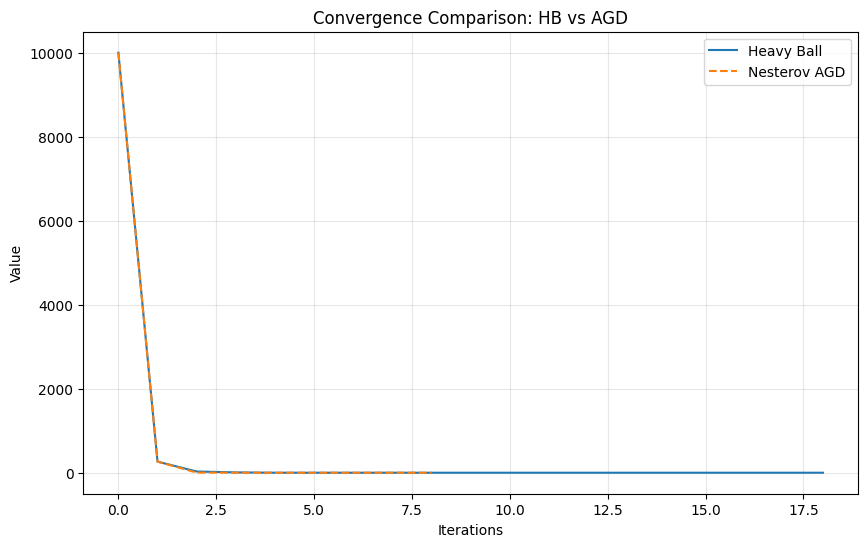

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history_hb, label='Heavy Ball')
plt.plot(history_agd, label='Nesterov AGD', linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Convergence Comparison: HB vs AGD')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Conclusion
Accelerated Gradient Descent is almost 2X as fast as Heavy Ball method. We can see that AGD needs 8 iterations to converge whereas Heavy Ball takes 18 iterations to reach that level.
